# Simple Linear Regression 

In this notebook, we'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.


## Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
import pandas as pd

### The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets through TV media. The sales are in thousands of units and the budget is in thousands of dollars.

We’ll have here a deeper look at the data and what it means to apply a regression model to it.

On the basis of this data,suggest a marketing plan for next year that will result in high product sales.

In [2]:
advertising = pd.read_csv("tvmarketing.csv")

Now, let's check the structure of the advertising dataset.

In [3]:
# Display the first 5 rows
print(advertising.head())

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [5]:
# Display the last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [ ]:
# Let's check the columns
advertising.info()

In [ ]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

In [ ]:
# Let's look at some statistical information about the dataframe.
advertising.describe()

# Visualising Data Using Seaborn

In [6]:
# Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

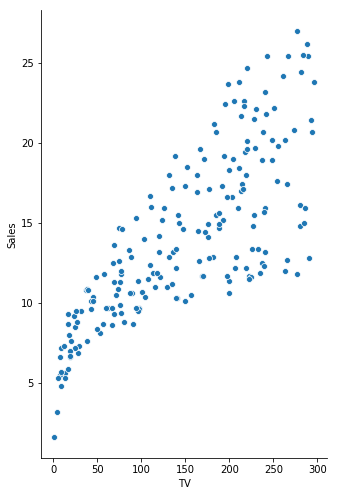

In [8]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(advertising, x_vars='TV', y_vars='Sales',height=7, aspect=0.7, kind='scatter')

# Perfroming Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in Model Building using ```sklearn```

Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows: 

In [ ]:
# 1. Create the datasets X_train, y_train, X_test and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# 2. Create (or instantiate) an object of the model you want to build, e.g.
lr = LinearRegression()

# 3. Fit the model using the training data 
lr.fit(X_train, y_train)

# 4. Predict the labels using the test data X_test
y_pred = lr.predict(X_test)


# 5. Evaluate the model using an appropriate metric by comparing y_test and y_predicted
r_squared = r2_score(y_test, y_pred)

## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [9]:
# Putting feature variable to X
X = advertising['TV']

# Print the first 5 rows
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [10]:
# Putting response variable to y
y = advertising['Sales']

# Print the first 5 rows
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

## Splitting Data into Training and Testing Sets

In [11]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , test_size=0.3, random_state=100)

In [12]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [13]:
train_test_split   #Press Tab to auto-fill the code
#Press Tab+Shift to read the documentation

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [14]:
#It is a general convention in scikit-learn that observations are rows, while features are columns. 
#This is needed only when you are using a single feature; in this case, 'TV'.

import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140, 1)
(60, 1)
(60, 1)


## Performing Linear Regression

In [16]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Coefficients Calculation

In [17]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

[6.98966586]
[[0.04649736]]


$y = 6.989 + 0.0464 \times TV $<br>

Now, let's use this equation to predict our sales.

## Predictions

In [18]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [21]:
type(y_pred)

numpy.ndarray

#### Computing RMSE and R^2 Values

Text(0, 0.5, 'Sales')

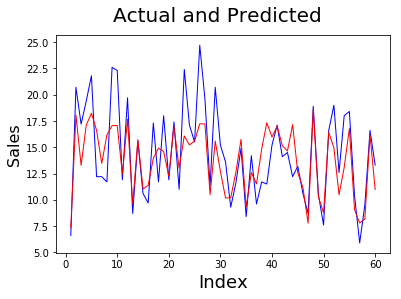

In [22]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=1, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=1, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

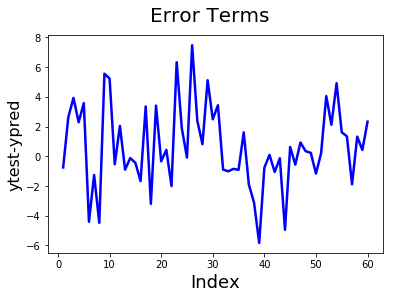

In [23]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [25]:
r_squared = r2_score(y_test, y_pred)

In [26]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.97579853285485
r_square_value : 0.5942987267783302


Text(0, 0.5, 'Predicted Y')

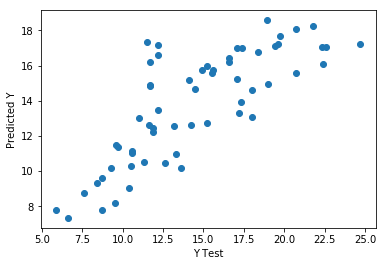

In [29]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')